# 라이브러리 설치 및 Import

In [6]:
!pip3 install selenium webdriver_manager beautifulsoup4 pandas statsmodels
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess


Defaulting to user installation because normal site-packages is not writeable

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# 함수 모음

In [7]:
# 그래프 (x,y) 좌표 추세선
def draw_graph(x_set, y_set, title="Title", x_key = "X", y_key = "Y"):
    # 그래프 스타일 설정
    plt.style.use('tableau-colorblind10')  # 세련된 그리드 스타일 사용

    # numpy 배열로 변환
    x = np.array(x_set)
    y = np.array(y_set)

    # LOWESS 스무딩으로 추세선 계산
    smoothed = lowess(y, x, frac=0.1, it=3)

    # 추세선 그리기 (부드러운 곡선)
    plt.plot(smoothed[:, 0], smoothed[:, 1], 'r', label='Trend line', linewidth=2)

    # 원래 데이터 포인트 그리기
    plt.scatter(x, y, color='blue', label='Data points', edgecolors='w', s=50, alpha=0.7)

    # 그래프 설정
    plt.xlabel(x_key)
    plt.ylabel(y_key)
    plt.title(title)
    plt.legend()

    # 그래프 보여주기
    plt.show()

# 그래프 dict 기반 막대그래프
def draw_graph_bar(data_dict, xlabel = 'xlabel', ylabel='ylabel', title='Title'):
    # x축과 y축 데이터 준비
    ranges = list(data_dict.keys())
    values = list(data_dict.values())

    # 막대 그래프 생성
    plt.figure(figsize=(10, 5))
    plt.bar(ranges, values, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()
    
# Shannon 다양성 지수 계산 함수
def calculate_diversity(row):
    non_zero_rates = row[row > 0]
    total = non_zero_rates.sum()
    if total == 0:
        return 0
    proportions = non_zero_rates / total
    diversity_index = -np.sum(proportions * np.log(proportions))
    return diversity_index

# csv -> DataFrame
def reading_csv(file_path):
    encodings = ['cp949', 'utf-8', 'ISO-8859-1', 'cp1252']  # List of encodings to try
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            return df  # or process your df
        except: pass
    return None

# 최소~최대 값 구간 생성
def create_blocks(min_value, max_value, block_size=0.3):
    # block_size 단위로 블록을 만들기 위한 min_value, max_value 조정
    min_block = np.floor(min_value * 10) / 10
    max_block = np.ceil(max_value * 10) / 10

    # 블록 생성
    blocks = []
    current_block_start = min_block

    while current_block_start < max_block:
        block_key = f"{current_block_start:.1f}~{current_block_start + block_size:.1f}"
        blocks.append(block_key)
        current_block_start += block_size

    return blocks

# 구간 조회
def find_block(value, min_value, max_value, block_size=0.3):
    min_block = np.floor(min_value * 10) / 10
    current_block_start = min_block

    while current_block_start < max_value:
        block_end = current_block_start + block_size
        if current_block_start <= value < block_end:
            return f"{current_block_start:.1f}~{block_end:.1f}"
        current_block_start += block_size

    return None


# 스탯 조회 및 다양성 지수 계산

In [8]:
PATH_PLAYER_STATS_CSV = 'csv_data/player_stats.csv'

df_stats = reading_csv(PATH_PLAYER_STATS_CSV)
rate_columns = [col for col in df_stats.columns if 'RATE_' in col]

# 각 투수의 다양성 지수 계산
df_stats['Diversity_Index'] = df_stats[rate_columns].apply(calculate_diversity, axis=1)
df_stats


,YEAR,RATE_2Seam,RATE_4Seam,RATE_Cutt,RATE_Curv,RATE_Slid,RATE_Chan,RATE_Sink,RATE_Fork,RATE_Knuc,...,SPEED_Cutt,SPEED_Curv,SPEED_Slid,SPEED_Chan,SPEED_Sink,SPEED_Fork,SPEED_Knuc,SPEED_Other,WAR,Diversity_Index
0,2013,0.0,58.9,0.4,5.1,22.6,12.3,0.0,0.0,0.0,...,134.0,118.1,127.6,125.8,0.0,0.0,0.0,90.6,6.44,1.110307
1,2015,0.0,60.9,0.0,4.2,20.6,13.2,0.0,0.0,0.0,...,0.0,120.1,127.3,122.0,0.0,0.0,0.0,0.0,1.57,1.077527
2,2016,0.1,51.4,0.0,7.3,24.0,17.2,0.0,0.0,0.0,...,0.0,118.5,127.3,122.3,0.0,0.0,0.0,0.0,0.13,1.185327
3,2020,0.0,55.1,0.0,9.6,27.8,7.5,0.0,0.0,0.0,...,0.0,116.1,125.1,127.9,0.0,0.0,0.0,0.0,-0.09,1.103522
4,2021,0.0,47.3,0.0,2.8,36.4,13.5,0.0,0.0,0.0,...,0.0,116.8,129.6,128.5,0.0,0.0,0.0,0.0,-0.06,1.092425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2019,0.0,61.0,0.0,0.0,36.8,2.0,0.3,0.0,0.0,...,0.0,0.0,133.1,133.4,144.3,0.0,0.0,0.0,1.10,0.765303
435,2020,0.0,57.8,0.0,0.0,34.1,6.4,1.6,0.0,0.0,...,0.0,142.0,130.3,129.3,141.1,0.0,0.0,0.0,2.33,0.925738
436,2021,0.0,55.9,0.0,0.0,34.2,9.0,0.8,0.0,0.0,...,0.0,0.0,129.2,130.9,142.5,0.0,0.0,0.0,1.93,0.954314
437,2022,0.1,60.9,0.0,0.1,23.1,8.4,2.1,5.0,0.0,...,0.0,126.0,130.4,131.9,145.9,133.5,0.0,0.0,1.15,1.115283


# 다양성 지수 vs WAR (추세선)

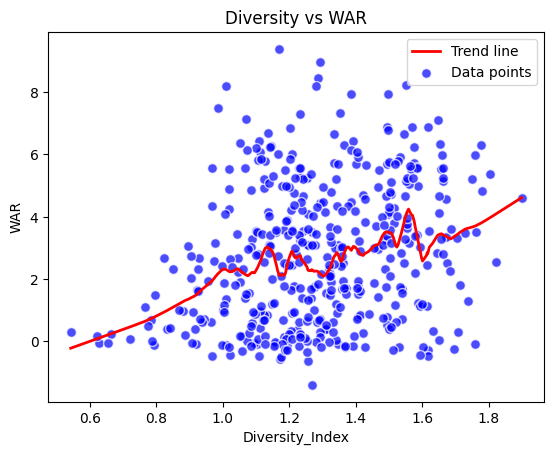

In [9]:
x_key, y_key = 'Diversity_Index', 'WAR'
x_set, y_set = df_stats[x_key], df_stats[y_key]

draw_graph(x_set, y_set, x_key=x_key, y_key=y_key, title="Diversity vs WAR")

# 다양성 지수 vs WAR (막대그래프)

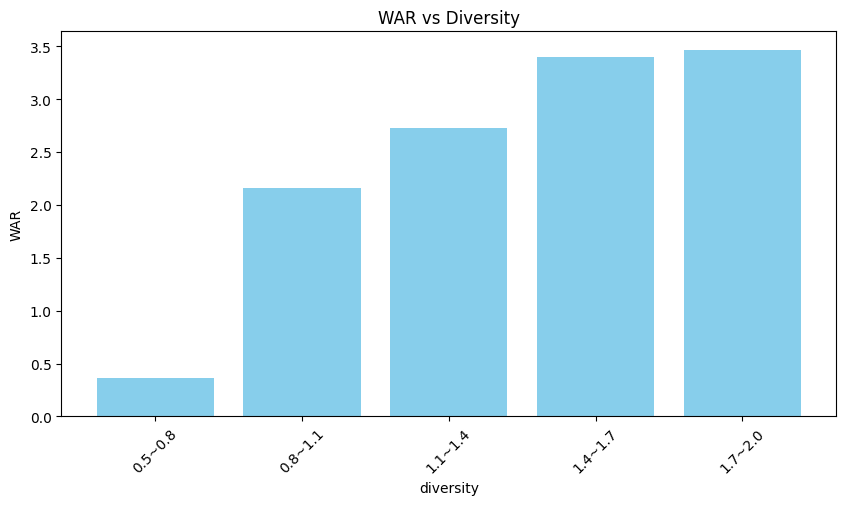

In [12]:
# 최대 최소 다양성 지수 설정
x_key = "Diversity_Index"
min_diff = df_stats[x_key][df_stats[x_key] > 0].min()
max_diff = df_stats[x_key].max()

# 구간 형성 및 평균 구간별WAR계산
blocks = {block: {"WAR":0, "Size":0.000000000000000001} for block in create_blocks(min_diff, max_diff)}
block_size = 0.3
for diversity, war in zip(df_stats[x_key], df_stats['WAR']):
    block_key = find_block(diversity, min_diff, max_diff)
    if block_key and (block_key in blocks):
        blocks[block_key]['WAR'] += war
        blocks[block_key]['Size'] += 1
data_box = {b_key: value['WAR']/value['Size'] for b_key, value in blocks.items()}

# 그래프 출력
title = 'WAR vs Diversity'
x_label, y_label = 'diversity', 'WAR'
draw_graph_bar(data_box, title=title, xlabel=x_label,ylabel=y_label)
